# CST PTM Data Overview

The PTM data from CST has a significant amount of missing data and requires special consideration when normalizing. My starting point will be ratio-level-data where log2 ratios have been calculated from the cancerous cell lines compared to the non-cancerous 'Normal Pool' data from within the plex. This data is under the lung_cellline_3_1_16 directory and each PTM type has its own 'combined_ratios.tsv' file

## Phosphorylation Data
I'll start by having a look at the phosphorylation data that can be found in 

`lung_cellline_3_1_16/lung_cellline_phospho/lung_cellline_TMT_phospho_combined_ratios.tsv`

This file was made using the `process_latest_cst_data.py` script. First I'll make the necessary imports. 

In [1]:
# imports and plotting defaults
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')
from copy import deepcopy

# use clustergrammer module to load/process (source code in clustergrammer directory)
from clustergrammer import Network

Next, I'll load the phosphorylation ratio data and simplify the column names (to improve readability)

In [2]:
# load phosphorylation data and export as pandas dataframe: inst_df
net = deepcopy(Network())
filename = 'lung_cellline_3_1_16/lung_cellline_phospho/' + \
'lung_cellline_TMT_phospho_combined_ratios.tsv'
net.load_file(filename)
tmp_df = net.dat_to_df()
inst_df = tmp_df['mat']

# simplify column names (remove categories)
col_names = inst_df.columns.tolist()
simple_col_names = []
for inst_name in col_names:
    simple_col_names.append(inst_name[0])

inst_df.columns = simple_col_names

I loaded the phosphorylation tsv file using clustergrammer and exported it as a pandas dataframe. We can see that there are 5798 unique phosphorylation sites measured in all 45 lung cancer cell lines. 

In [3]:
inst_df.shape

(5798, 45)

### Missing Phosphorylation Data
However, there is also a large amount of missing data, e.g. no cell line has all 5798 phosphorylations mesaured. We can plot the number of measured phosphorylation sites (e.g. non-NaN values in the dataframe) below to get a sense of the amount of missing data

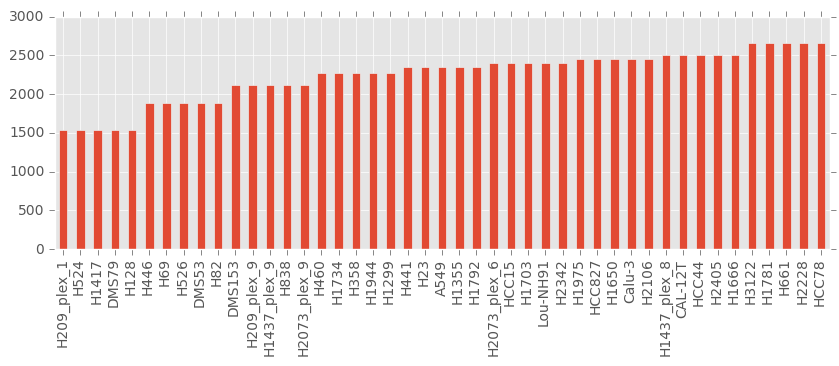

In [4]:
inst_df.count().sort_values().plot(kind='bar', figsize=(10,3))

In the above visualization I have ranked the cell lines based in increasing number of measurements. We can see that there is a pattern in the missing data. The 45 cell lines appear to be aranged into nine groups of 5 cell lines each. This correponds to the 9 'plexes', or 'batches', in which the cell lines were measured. Each plex measured one control, Normal Pool, and five cancer cell lines (note that some cell lines have been measured in more than one plex and these have their plex number appended to their name). 

We can also plot the avearge values of all measured phosphorylations in each cell line. 


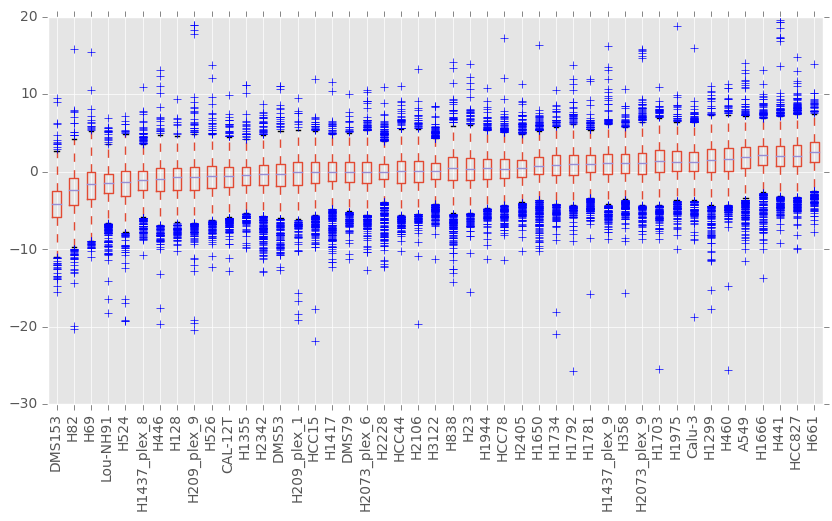

In [10]:
# get the order of the cell lines based on their mean 
sorter = inst_df.mean().sort_values().index.tolist()
# reorder based on ascending mean values
sort_df = inst_df[sorter]
# box plot of PTM values ordered based on increasing mean 
sort_df.plot(kind='box', figsize=(10,5), rot=90)